## การแจกแจงความน่าจะเป็นแบบต่อเนื่อง (Discrete Probability Distribution)  

---

### การแจกแจงแบบปกติ (Normal Distribution)

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import perm, comb

ทำการจำลองค่าของตัวแปรสุ่มที่มีการแจกแจงแบบปกติ ในที่นี้ค่า loc คือค่าเฉลี่ย (𝜇) และ scale คือค่าส่วนเบี่ยงเบนมาตราฐาน (𝜎)

In [ ]:
x_norm = stats.norm.rvs(loc=0, #คือค่า 𝜇
                        scale=1, #คือค่า 𝜎
                        size=10000) 
#แสดง 50 ค่าแรก
x_norm[1:50]

array([ 1.3471124 , -0.41191946,  0.4960327 ,  0.296525  , -0.54698573,
       -0.25266569,  0.32260238, -0.66862803,  0.14766079, -0.55919078,
       -1.42790496,  0.29223491, -2.12232231,  0.79872719, -0.87487303,
       -0.67766222, -0.03692261, -0.85586875,  1.46832459,  0.54685349,
        0.67606213, -0.3087471 , -0.43603515, -1.21161587, -1.38019246,
        0.28987784,  1.53477842,  0.19089769,  0.96986567, -0.89851563,
        0.49045169,  1.7987635 , -3.36930984, -0.16740968, -0.6873988 ,
       -0.48040731,  1.18129516,  2.46011156, -0.16125643, -0.45140927,
        1.3662628 ,  1.20461548,  0.13708677,  0.41592545, -2.15407518,
        1.22237801,  2.4629468 ,  1.96697452,  1.88604652])

ทดสอบหาค่าเฉลี่ยและส่วนเบี่ยงเบนมาตราฐาน:

In [ ]:
np.mean(x_norm) #𝜇

-0.01159643677716968

In [ ]:
np.std(x_norm) #𝜎 ในที่นี้ถือว่า x_norm เป็นประชากร ddof=0 (default)

1.012166857593543

\
histrogram แสดงการแจกแจงความน่าจะเป็น:

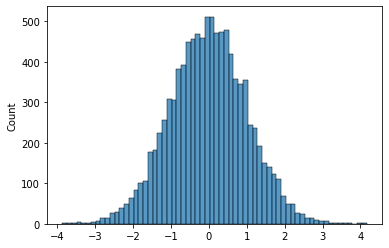

In [ ]:
sns.histplot(data=x_norm)

\
ปรับแต่งกราฟที่ได้:

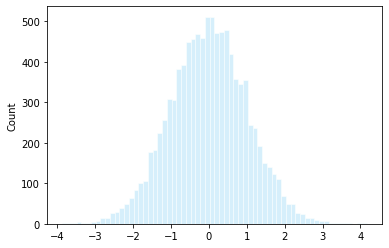

In [ ]:
sns.histplot(data=x_norm,
             color='#34b1eb', #สีของกราฟ
             edgecolor='white', #สีเส้นขอบของแต่ละแท่ง
             lw=0.5, #ความหนาเส้นขอบแต่ละแท่ง
             alpha=.2) #ความโปร่งใสของกราฟ

\
ให้แกน y แสดงเป็น probability:

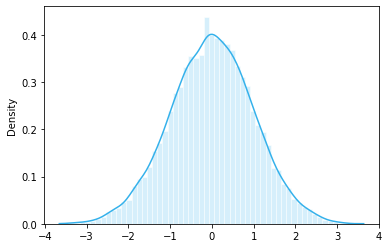

In [ ]:
sns.histplot(data=x_norm,
             color='#34b1eb', 
             edgecolor='white',
             lw=0.5, 
             alpha=.2,
             kde=True, #แสดงเส้น probability
             stat="density") #ปรับเป็น density พื้นที่ใต้กราฟจะมีผมรวมคือ 1 

\
หา probability เมื่อตัวแปรสุ่มมีค่า 0 โดยใช้ฟังก์ชัน pdf (Probability Density Function):

In [ ]:
stats.norm.pdf(x=0) #default loc=0, scale=1

0.3989422804014327

\
หาความน่าจะเป็นสะสมหรือพื้นที่ใต้กราฟ เมื่อตัวแปรสุ่มมีค่า 0 โดยใช้ฟังก์ชัน cdf (Cumulative Distribution Function):

In [ ]:
stats.norm.cdf(x=0)

0.5

\
หาค่าตัวแปรสุ่ม เมื่อทราบ (หรือกำหนด) ความน่าจะเป็นสะสมหรือพื้นที่ใต้กราฟ โดยใช้ฟังก์ชัน ppf (Percent Point Function):

เมื่อพื้นที่ใต้กราฟ = 0.5

In [ ]:
stats.norm.ppf(q=0.5)

0.0

เมื่อพื้นที่ใต้กราฟ = 0.9

In [ ]:
stats.norm.ppf(0.9)

1.2815515655446004

เมื่อพื้นที่ใต้กราฟ = 0.1

In [ ]:
stats.norm.ppf(0.1)

-1.2815515655446004

---

### การประมาณค่าความน่าจะเป็นแบบทวินามด้วยการแจกแจงแบบปกติ

การแจกแจงทวินามซึ่งมีตัวแปรสุ่ม 𝑋\~𝑏(𝑥;𝑛, p) ที่มี 𝑛 ขนาดใหญ่ 𝑛⟶∞ และ p⟶0.5 จะสามารถประมาณ  𝑋\~𝑁(𝜇=𝑛p, 𝜎^2=𝑛pq)

\
การแจกแจงทวินามที่มี 𝑛=50 และ p=0.5:

In [ ]:
x_binom = stats.binom.rvs(p=0.5,
                          n=1000,
                          size=10000)

\
histrogram แสดงการแจกแจงความน่าจะเป็น:

(0.0, 0.03)

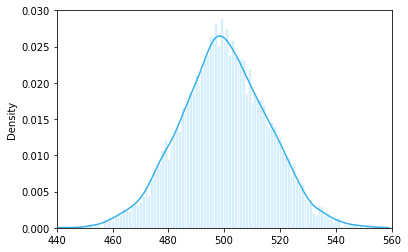

In [ ]:
sns.histplot(data=x_binom,
             color='#34b1eb', 
             edgecolor='white',
             lw=0.5, 
             alpha=.2,
             kde=True, 
             stat="density",
             discrete = True #x_binom เป็นค่าของตัวแปรสุ่มแบบไม่ต่อเนื่อง
             )
plt.xlim(440, 560)
plt.ylim(0, 0.03)

\
เปรียบเทียบกับ histrogram ของการแจกแจงแบบปกติ โดยกำหนด 𝜇=np และ 𝜎=sqrt(npq):

(0.0, 0.03)

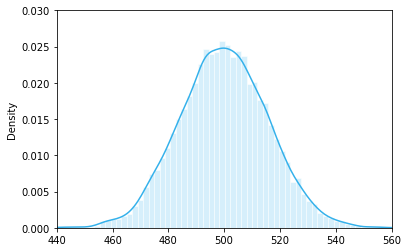

In [ ]:
X_norm = stats.norm.rvs(loc=1000*0.5, #คือค่า 𝜇=np
                        scale=np.sqrt(1000*0.5*0.5), #คือค่า 𝜎=sqrt(npq)
                        size=10000) 
sns.histplot(data=X_norm,
             color='#34b1eb', 
             edgecolor='white',
             lw=0.5, 
             alpha=.2,
             kde=True, 
             stat="density")
plt.xlim(440, 560)
plt.ylim(0, 0.03)

จะเห็นได้ว่ากราฟมีลักษณะคล้ายกัน

\
**การประมาณความน่าจะเป็นแบบทวินามด้วยการแจกแจงแบบปกติ**

***case 1***  
สนใจที่ตัวแปรสุ่มมีค่า 520 ต้องการหาพื้นที่ใต้กราฟ

ใช้ binom.cdf:

In [ ]:
stats.binom.cdf(n=1000, p=0.5, k=520)

0.9026168357691174

\
ประมาณด้วยการแจกแจงปกติ norm.cdf จะต้องบวก 0.5 ให้กับค่าของตัวแปรสุ่ม:

In [ ]:
stats.norm.cdf(x=520+0.5,
               loc=1000*0.5, #𝜇=np
               scale=np.sqrt(1000*0.5*0.5)) #𝜎=sqrt(npq)

0.9026041854876157

การประมาณมีหลักการดังรูปต่อไปนี้  
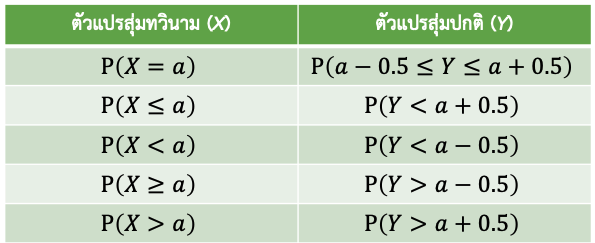

\
***case 2***  
สนใจความน่าจะเป็นเมื่อตัวแปรสุ่มมีค่า = 520

ใช้ binom.pmf:

In [ ]:
stats.binom.pmf(n=1000, p=0.5, k=520)

0.011340982371187715

\
ประมาณด้วยการแจกแจงปกติ norm.cdf:

In [ ]:
mu = 1000*0.5 #𝜇=np
sigma = np.sqrt(1000*0.5*0.5) #𝜎=sqrt(npq)

In [ ]:
stats.norm.cdf(x=((520+0.5)-mu) / sigma) - stats.norm.cdf(x=((520-0.5)-mu) / sigma)


0.011338298559386839

In [ ]:
x_uniform = stats.uniform.rvs(loc=0, #คือค่า 𝜇
                  scale=1, #คือค่า 𝜎
                  size=10000) 
#แสดง 50 ค่าแรก
x_uniform[1:50]

array([0.57856993, 0.43431052, 0.77870748, 0.09035301, 0.4245789 ,
       0.20621056, 0.62923396, 0.65927016, 0.69958973, 0.71142551,
       0.58021347, 0.49534559, 0.10329462, 0.95261334, 0.68795533,
       0.22368012, 0.77630832, 0.73909152, 0.46080828, 0.14861787,
       0.30516651, 0.57789641, 0.5604112 , 0.83639729, 0.71585603,
       0.22605891, 0.37463218, 0.45055601, 0.72226132, 0.41571075,
       0.69287538, 0.70691801, 0.90691641, 0.3631611 , 0.22179463,
       0.43865422, 0.56506651, 0.98825004, 0.47771426, 0.79721337,
       0.07051056, 0.40454925, 0.69745668, 0.25103748, 0.32068937,
       0.1649172 , 0.82366311, 0.19780066, 0.31462889])

\
ปรับแต่งกราฟที่ได้:

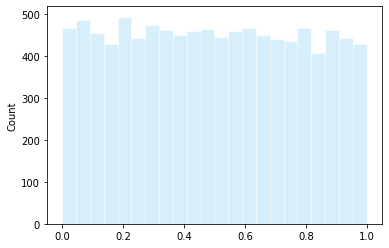

In [ ]:
sns.histplot(data=x_uniform,
             color='#34b1eb', #สีของกราฟ
             edgecolor='white', #สีเส้นขอบของแต่ละแท่ง
             lw=0.5, #ความหนาเส้นขอบแต่ละแท่ง
             alpha=.2) #ความโปร่งใสของกราฟ

\
ให้แกน y แสดงเป็น probability:

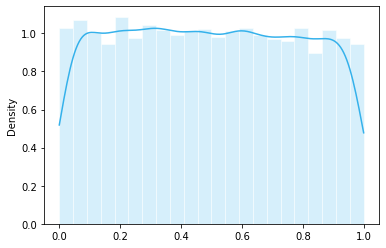

In [ ]:
sns.histplot(data=x_uniform,
             color='#34b1eb', 
             edgecolor='white',
             lw=0.5, 
             alpha=.2,
             kde=True, #แสดงเส้น probability
             stat="density") #ปรับเป็น density พื้นที่ใต้กราฟจะมีผมรวมคือ 1 

\
หา probability เมื่อตัวแปรสุ่มมีค่า 0 โดยใช้ฟังก์ชัน pdf (Probability Density Function):

In [ ]:
stats.uniform.pdf(0)

1.0

\
หาความน่าจะเป็นสะสมหรือพื้นที่ใต้กราฟ เมื่อตัวแปรสุ่มมีค่า 0 โดยใช้ฟังก์ชัน cdf (Cumulative Distribution Function):

In [ ]:
stats.norm.cdf(0)

0.5

\
หาค่าตัวแปรสุ่ม เมื่อทราบ (หรือกำหนด) ความน่าจะเป็นสะสมหรือพื้นที่ใต้กราฟ โดยใช้ฟังก์ชัน ppf (Percent Point Function):

เมื่อพื้นที่ใต้กราฟ = 0.5

In [ ]:
stats.norm.ppf(0.5)

0.0

เมื่อพื้นที่ใต้กราฟ = 0.9

In [ ]:
stats.norm.ppf(0.9)

1.2815515655446004

เมื่อพื้นที่ใต้กราฟ = 0.1

In [ ]:
stats.norm.ppf(0.1)

-1.2815515655446004